### Cluster Analysis

### Contents :

I. Unsupervied Learning Models in Machine Learning(ML)
<br>II. Cluster Analysis
<br>III. Types of Cluster Analysis
<br>IV. K-Means Clustering
<br>V. K-Means Algorithm
<br>VI. Implementation of K-Means Clustering Algorithm using **'Framingham Heart  Study Dataset'** dataset with interpretations.
<br>VII. Conclusion

### I. Unsupervied Learning Models in Machine Learning(ML)
These are the set of Machine Learning Algorithms which do not have the knowledge of the outcome variable in the dataset.
<br>The algorithm must find out the possible values of the outcome variable.

<br>**Examples :** Clustering, Principal Component Analysis.

### II. Cluster Analysis 
* Clustering is the process of dividing the datasets into groups, consisting of similar data points.
* Points in the same group are as similar as possible.
* Points in different group are as different as possible.

#### Business Use :
1. Retail Business : *analyzing customer shopping behaviour, sales campaign and customer retention.*
2. Insurance Industry : *Fraud Detection, Risk Factor Identification and customer retention.*
3. Banking Sector : *Customer Segmentation, Credit Scoring and analyzing custoner profitability.*

#### Applications using Clustering Analysis :
1. Netflix for movie recommendation.
2. Amazon recommendation system.
3. Flickr Photos.

### III. Types of Clustering

#### 1. Exclusive Clustering :
It is a hard clustering method, which means the data points belongs exclusively to one cluster.
<br>**Examples :** K-Means Clustering.

#### 2. Overlapping Clustering :
It is a soft clustering method, which means the data points may belong to multiple clusters.
<br>**Examples :** Fuzzy, C-Means Clustering

#### 3. Hierarchical Clustering :
It is a method of cluster analysis which seeks to build a hierarchy of clusters.
<br>Strategies for hierarchical clustering generally fall into two types:

**a) Agglomerative Clustering :**
Each datapoint starts in its own cluster and pairs of clusters are merged as one moves up the hierarchy.

**b) Divisive Clustering :**
All datapoints start in one cluster, then splits are performed recursively as one moves down the hierarchy.

### IV. K-Means Clustering
In this assignment we will be focusing on the K-Means Clustering.
<br>-K-Means clustering is one the frequently used clustering algorithms. It is exclusive clustering method.
<br>-One of the simplest and popular unsupervised machine learning algorithms.
<br>-The number of clusters**(i.e. K)** is decided *priori.*
<br>-The observations or the data points are assigned to the one of the clusters based on the similarities, which are based on **distance between the observations and the centroid of the clusters.**

### V. K-Means Algorithm

* K -> number of clusters.
 
#### Steps :
<br>1. Decide the value of K(which can be tuned later).
<br>2. Choose K observations from the data that are likely to be in different clusters. There are many ways of choosing these initial K values; the easiest approach is to choose observations that are farthest(in one of the parameters of the data).
<br>3. The K observations selected in *step 2* are the centroids of those clusters.
<br>4. For remaining observations, find the cluster closest to the centroid. Add the new observation(say observation j) to the cluster with closest centroid. Adjust the centroid after adding a new observation to the cluster. The closest centroid is chosen based upon an appropriate distance measure.
<br>5. Repeat *step 4* until all the observations are assigned to a cluster.

#### NOTE :-
The above algorithm is called as  **'Lloyd's algorithm'**. It is the most common K-Means method.
<br>In python we have *KMeans()* function in *sklearn.cluster* library, which uses the same **'Lloyd's algorithm'** for implementation.
#### *-We are using KMeans() function in our implementation.*

### VI. Implementation of K-Means Clustering Algorithm using *'framingham heart study'* dataset with interpretations.

In [72]:
#Importing necessary libraries

import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

In [73]:
#Changing directory to the one containing the '.csv' file of the dataset
os.chdir('C:\\Users\\pooja\\Desktop\\PYTHON')

In [75]:
#Reading the dataset and print the head of the dataset
data = pd.read_csv('framingham.csv')
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [76]:
#selection of continuous numerical variables, to keep the dataset upto the actual requirements for execution of Algorithm
numerical_data = data[['totChol','diaBP','BMI']]

In [77]:
#Checking the 'NULL' and missing values
numerical_data.isnull().sum()

totChol    50
diaBP       0
BMI        19
dtype: int64

In [79]:
#Imputing the missing values with mean of the variable.
numerical_data['totChol'].fillna(np.mean(numerical_data['totChol']), inplace = True)
numerical_data['BMI'].fillna(np.mean(numerical_data['BMI']), inplace = True)

#printing the head of the data after mean imputation
numerical_data.head()

,totChol,diaBP,BMI
0,195.0,70.0,26.97
1,250.0,81.0,28.73
2,245.0,80.0,25.34
3,225.0,95.0,28.58
4,285.0,84.0,23.10


In [83]:
#Cross-checking the success of mean imputation
numerical_data.isnull().sum()

totChol    0
diaBP      0
BMI        0
dtype: int64

In [84]:
#Statistical description of the 3 variables.
numerical_data.describe()

,totChol,diaBP,BMI
count,4240.000000,4240.000000,4240.000000
mean,236.699523,82.897759,25.800801
std,44.327521,11.910394,4.070687
min,107.000000,48.000000,15.540000
25%,206.000000,75.000000,23.077500
50%,234.000000,82.000000,25.410000
75%,262.000000,90.000000,28.032500
max,696.000000,142.500000,56.800000


#### Standardization : 
<br>- From the above table as we can see that the scale and range of all the three variables are different. 
<br>- This could be a bit problematic as the clusters mights get segmented based on the variable having larger scale. And the other variables can appear numerically insignificant as compared to the variable having larger scale.
<br>- Hence before creating clusters, all the features need to be standardized and brought on the standardized scale.
<br>- Standardization rescales data to have a mean(μ) of 0 and standard deviation(σ) of 1 (unit variance).
<br>- **Note : For most applications standardization is recommended.**


In [81]:
#Standardization formula
data_standard_scaled = numerical_data.apply(lambda numerical_data: (numerical_data - np.mean(numerical_data))/np.std(numerical_data))


In [85]:
#Standardized dataset
data_standard_scaled.sample(3)

,totChol,diaBP,BMI
516,-0.760329,-0.411266,0.702470
2480,-0.151155,-1.418908,-0.120584
1651,0.209837,-0.747146,-0.174635


In [86]:
#Statistical description of the 3 variables after standardization.
data_standard_scaled.describe()

,totChol,diaBP,BMI
count,4.240000e+03,4.240000e+03,4.240000e+03
mean,-1.266702e-15,1.984786e-17,2.231391e-15
std,1.000118e+00,1.000118e+00,1.000118e+00
min,-2.926282e+00,-2.930371e+00,-2.520953e+00
25%,-6.926429e-01,-6.631763e-01,-6.690817e-01
50%,-6.090666e-02,-7.538502e-02,-9.601497e-02
75%,5.708296e-01,5.963764e-01,5.483012e-01
max,1.036274e+01,5.004811e+00,7.616124e+00


In [88]:
#Initialize 'KMeans' with the number of clusters(k) as the parameter
#'init : k-means++’ -> selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
#random_state -> Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.

kmeans_3 = KMeans(n_clusters=3, init = 'k-means++', random_state = 50)

#Calling fit() with the DataFrame, it contains the entities and features that need to be clustered.
kmeans_3.fit(data_standard_scaled)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [97]:
#'p -> to store the labels of the observations, representing the respective cluster number.

p=pd.DataFrame(kmeans_3.labels_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=50, tol=0.0001, verbose=0)

In [109]:
#int32 : as it only contains the cluster numbers.
p.dtypes

0    int32
dtype: object

In [110]:
p.head()

,0
0,1
1,2
2,0
3,2
4,0


In [112]:
#Cluster Centroids
kmeans_3.cluster_centers_

array([[ 1.0964751 ,  0.01886123, -0.1673024 ],
       [-0.62549761, -0.59030483, -0.53411186],
       [-0.05559528,  0.91847254,  1.00724508]])

#### Finding optimal Number of Clusters using Elbow Curve Method
<br>- Deciding on the correct number of clusters**(i.e. K)** is very important.
<br>- As we increase the number of clusters, the total variance of all the clusters will starts reducing.
<br>- Variance will be equal to '0' if number clusters is equal to the number of observations.
<br>- So elbow curve method is used to solve this problem.
<br>- It considers the percentage of variance(y-axis) explained as a function of the number of clusters(y-axis).
<br>- The optimal number of clusters is chosen in such a way that adding another cluster does not change the variance significantly.

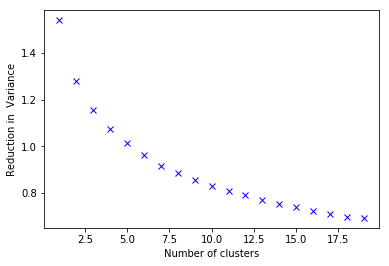

In [118]:
#Number of clusters(Elbow method)
a = []

for i in range(1,20): #creates clusters ranging from 1 to 19
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 100).fit(data_standard_scaled)
    a.append(sum(np.min(cdist(data_standard_scaled, kmeans.cluster_centers_, 'euclidean'), axis = 1))/data_standard_scaled.shape[0])

plt.xlabel('Number of clusters')
plt.ylabel('Reduction in  Variance')
plt.plot(K, a,'bx')
plt.show()

Thus from above graph we can find that the optimal number of clusters**(i.e. K)** to be considered is **3** as after which there is no significant reduction in the variance.
<br>Therefore, *K=3*.

#### Silhouette Score
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.

The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

In [120]:
#Calculating Silhouette score using Euclidian distance.
for i in range(2,15):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state = 100).fit(data_standard_scaled).labels_
    score = silhouette_score(data_standard_scaled, kmeans, metric='euclidean', random_state=100, sample_size=10000)
    print('"K" Score for k = '+str(i)+' is '+ str(score))

"K" Score for k = 2 is 0.2840034532604224
"K" Score for k = 3 is 0.2617925007911481
"K" Score for k = 4 is 0.23791366792706836
"K" Score for k = 5 is 0.2400680220587621
"K" Score for k = 6 is 0.23049102717051378
"K" Score for k = 7 is 0.23293135233379997
"K" Score for k = 8 is 0.22699057670092668
"K" Score for k = 9 is 0.21918253823339573
"K" Score for k = 10 is 0.2221040165846736
"K" Score for k = 11 is 0.22251648088474382
"K" Score for k = 12 is 0.2213167465558738
"K" Score for k = 13 is 0.22216971494292953
"K" Score for k = 14 is 0.22159321696133158


In [121]:
kmeans_3 = KMeans(n_clusters=3, init = 'k-means++', random_state=100)
kmeans_3.fit(data_standard_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=100, tol=0.0001, verbose=0)

In [124]:
#Checking the count of number to labels, as it should be equal to the total number of oobservation in dataset.
kmeans_3.labels_
kmeans_3.labels_.shape

(4240,)

In [125]:
#Counting the number of observations per cluster
unique, counts = np.unique(kmeans_3.labels_,return_counts=True)
print(dict(zip(unique,counts)))

{0: 1210, 1: 1854, 2: 1176}


In [130]:
# Data labelled with cluster numbers
numerical_data_new  = numerical_data.copy()
numerical_data_new['labels'] = kmeans_3.labels_
numerical_data_new.head()

,totChol,diaBP,BMI,labels
0,195.0,70.0,26.97,1
1,250.0,81.0,28.73,0
2,245.0,80.0,25.34,2
3,225.0,95.0,28.58,0
4,285.0,84.0,23.10,2


In [138]:
#Cluster Variances
numerical_data_new.groupby('labels')['totChol','diaBP','BMI'].agg(['mean','std']).reset_index()

labels     totChol                 diaBP                   BMI          
                mean        std       mean        std       mean       std
0      0  235.029329  33.816663  93.996281  11.216338  29.848540  3.976721
1      1  207.803931  26.445265  75.896440   8.165933  23.634298  2.724957
2      2  283.972789  35.387233  82.516156   8.534072  25.051593  2.637922

#### Interpretation
* Cluster 0 of Patients : Patients on an an average having *total cholesterol* **235mg/dL** of blood, *diastolic blood pressure* **94mmHg**, *Body Mass Index(BMI)* **30kg/sq.m**
* Cluster 1 of Patients : Patients on an an average having *total cholesterol* **207mg/dL** of blood, *diastolic blood pressure* **76mmHg**, *Body Mass Index(BMI)* **24kg/sq.m**
* Cluster 2 of Patients : Patients on an an average having *total cholesterol* **284mg/dL** of blood, *diastolic blood pressure* **82mmHg**, *Body Mass Index(BMI)* **25kg/sq.m**

C:\Users\pooja\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


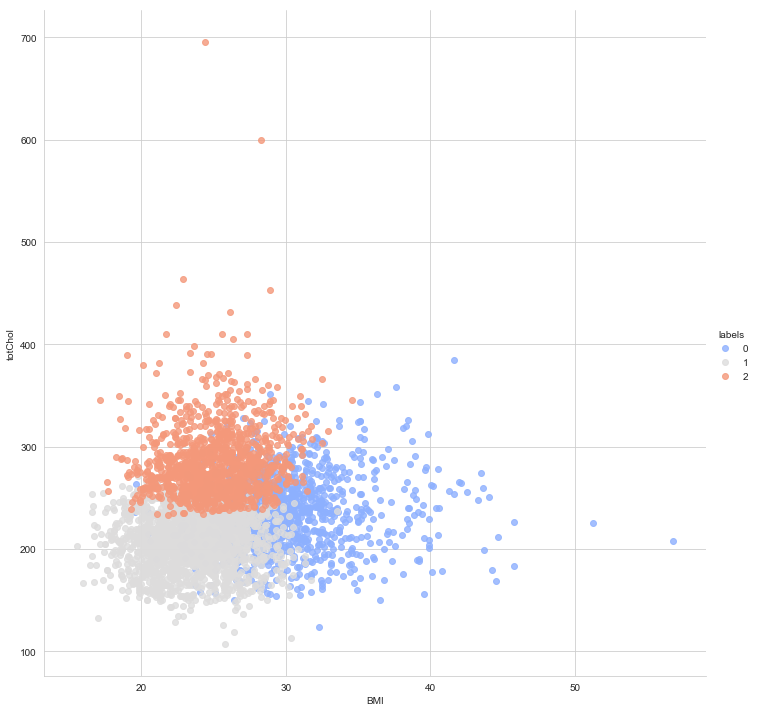

In [152]:
#Scatterplot for all observations segmented as clusters with respect to BMI and total_cholestrol
sns.set_style('whitegrid')
sns.lmplot('BMI','totChol',data = numerical_data_new, hue = 'labels',
          palette='coolwarm',size=10, aspect=1, fit_reg=False)

### VII. Conclusion :
* Standardization helped us to first bring all the variable on a standard scale.
* The *'Elbow Curve Method'* helped us to obtain the optimal number of clusters, in which we can divide the heart patients  is **3**
* From Silhouette score we can see that the objects are well matched to their own cluster compared to other clusters.
* Also as most objects have a high value, thus the clustering configuration is appropriate.
* Thus our K-Means Clustering has been successful.